# Download dataset (i3: 2000 train images and 500 test images)

In [1]:
!pip install opendatasets

import opendatasets as od
od.download("https://sviro.kl.dfki.de/download/i3/?wpdmdl=378&refresh=625e1bba442391650334650")

You should consider upgrading via the 'c:\users\abianchi\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.
0it [00:00, ?it/s]

1576017920it [08:10, 2090165.26it/s]                                                                                                                                     

# Extract all images

In [2]:
import zipfile
with zipfile.ZipFile(".\i3_grayscale_wholeImage.zip","r") as zip_ref:
    zip_ref.extractall(".")

# Download the bounding box labels for i3 (train and test)

In [4]:
od.download("https://sviro.kl.dfki.de/download/bmw-i3-5/?wpdmdl=456&refresh=625e1bbbb427b1650334651")



0it [00:00, ?it/s]



  0%|                                                                                                                                         | 0/616472 [00:00<?, ?it/s]

  3%|███▏                                                                                                                      | 16384/616472 [00:01<00:07, 77044.95it/s]

  7%|████████                                                                                                                  | 40960/616472 [00:01<00:06, 82831.38it/s]

 15%|█████████████████▊                                                                                                        | 90112/616472 [00:01<00:05, 88772.23it/s]

 43%|███████████████████████████████████████████████████                                                                     | 262144/616472 [00:01<00:02, 120632.83it/s]

 54%|█████████████████████████████████████████████████████████████████▍                                                      | 335872/616472 [0

# Extract all annotations

In [5]:
with zipfile.ZipFile(".\i3_boundingBoxes_wholeImage.zip","r") as zip_ref:
    zip_ref.extractall(".")

# Create new dataset structure for (Yolo model)

In [8]:
import os
import shutil

train_images_path = os.path.join('train', 'grayscale_wholeImage')
train_labels_path = os.path.join('train', 'boundingBoxes_wholeImage')
test_images_path = os.path.join('test_with_labels', 'grayscale_wholeImage')
test_labels_path = os.path.join('test_with_labels', 'boundingBoxes_wholeImage')

base_dir = os.getcwd()
new_dataset_path = 'YOLO_DATASET'

new_train_images_path = os.path.join(base_dir, new_dataset_path, 'images', 'train')
new_val_images_path = os.path.join(base_dir, new_dataset_path, 'images', 'val')
new_test_images_path = os.path.join(base_dir, new_dataset_path, 'images', 'test')
new_train_labels_path = os.path.join(base_dir, new_dataset_path, 'labels', 'train')
new_val_labels_path = os.path.join(base_dir, new_dataset_path, 'labels', 'val')
new_test_labels_path = os.path.join(base_dir, new_dataset_path, 'labels', 'test')

# Create all directories for images and labels
try:
    os.makedirs(new_train_images_path)
    os.makedirs(new_val_images_path)
    os.makedirs(new_test_images_path)    
    os.makedirs(new_train_labels_path)
    os.makedirs(new_val_labels_path)
    os.makedirs(new_test_labels_path)
except Exception as e:
    print(str(e))

def all_files(ext, path):
    
    return 

def copy_all(orig, dest, ext):
    """ All files with extension ext. Example: '.jpg' """
    files = list(filter(lambda f: f[-4:] == ext, os.listdir(orig)))
    """ Copy all files """
    for file in files:
        shutil.copy(
            os.path.join(orig, file), 
            os.path.join(dest, file))

car = 'i3'
        
base_train_images_path = os.path.join(base_dir, car, train_images_path)
copy_all(base_train_images_path, new_train_images_path, '.png')

base_train_labels_path = os.path.join(base_dir, car, train_labels_path)
copy_all(base_train_labels_path, new_train_labels_path, '.txt')

base_test_images_path = os.path.join(base_dir, car, test_images_path)
copy_all(base_test_images_path, new_test_images_path, '.png')

base_test_labels_path = os.path.join(base_dir, car, test_labels_path)
copy_all(base_test_labels_path, new_test_labels_path, '.txt')

# Move 1/5 of train data to validation data

In [9]:
import random

def ffunction():
    """ To ensure the same shuffling """
    return 0.3

def move_files(orig, dest):
    """ Move 1/5 of train data to validation data """
    files = os.listdir(orig)
    total = len(files)
    nr_val = int(total/5)
    random.shuffle(files, ffunction)
    val_files = files[:nr_val]
    for val_file in val_files:
        shutil.move(
            os.path.join(orig, val_file), 
            os.path.join(dest, val_file)
        )

print('Moving to validation images...')
train_images_path = os.path.join(base_dir, new_dataset_path, 'images', 'train')
val_images_path = os.path.join(base_dir, new_dataset_path, 'images', 'val')
move_files(train_images_path, val_images_path)

print('Moving to validation labels...')
train_labels_path = os.path.join(base_dir, new_dataset_path, 'labels', 'train')
val_labels_path = os.path.join(base_dir, new_dataset_path, 'labels', 'val')
move_files(train_labels_path, val_labels_path)

Moving to validation images...
Moving to validation labels...


# Create three description files for training

In [10]:
def list_to_file(path, fname):
    files = os.listdir(path)
    with open(os.path.join(base_dir, new_dataset_path, fname), 'w') as f:
        for file in files:
            f.write(os.path.join(path, file) + '\n')

print('creating train file...')
train_images_path = os.path.join(base_dir, new_dataset_path, 'images', 'train')
list_to_file(train_images_path, 'train.txt')

print('creating val file...')
val_images_path = os.path.join(base_dir, new_dataset_path, 'images', 'val')
list_to_file(val_images_path, 'val.txt')

print('creating test file...')
test_images_path = os.path.join(base_dir, new_dataset_path, 'images', 'test')
list_to_file(test_images_path, 'test.txt')

creating train file...
creating val file...
creating test file...


# Convert labels to the correct format to use with yolo v5 and apply normalization

#### SVIRO: [class_label], [x_upper_left_corner], [y_upper_left_corner], [x_lower_right_corner], [y_lower_right_corner]
#### YOLO : [class_label] [x_center] [y_center] [width] [height]  --> 'normalized and separated by space'

In [39]:
import os
base_dir = os.getcwd()
new_dataset_path = 'YOLO_DATASET'

# SVIRO images are all 960x640
im_w = 960
im_h = 640

def convert_to_yolo_bb(dir):
    files = os.listdir(dir)
    for file in files:
        
        data = ''
        with open(os.path.join(dir, file), 'r') as f:
            data = f.read()
        
        linhas = data.split('\n')
        new_content = ''
        for linha in linhas:
            parts = linha.split(',')
            if len(parts) == 5:
                x1, y1, x2, y2 = int(parts[1]), int(parts[2]), int(parts[3]), int(parts[4])
                # x1,y1,x2,y2 --> x,y,w,h
                w = x2-x1
                h = y2-y1
                x = x1+(w/2)
                y = y1+(h/2)
                # normalization
                x /= im_w
                y /= im_h
                w /= im_w
                h /= im_h
                
                new_content += parts[0]+' '+str(x)+' '+str(y)+' '+str(w)+' '+str(h)+'\n'
        
        if new_content != '':
            with open(os.path.join(dir, file), 'w') as f:
                f.write(new_content)

            
train_dir = os.path.join(base_dir, new_dataset_path, 'labels', 'train')
convert_to_yolo_bb(train_dir)
print('train data converted!')

val_dir = os.path.join(base_dir, new_dataset_path, 'labels', 'val')
convert_to_yolo_bb(val_dir)
print('val data converted!')

test_dir = os.path.join(base_dir, new_dataset_path, 'labels', 'test')
convert_to_yolo_bb(test_dir)
print('test data converted!')

train data converted!
val data converted!
test data converted!


# Class distribution analysis

In [40]:
import os
base_dir = os.getcwd()
new_dataset_path = 'YOLO_DATASET'

# For object detection this dataset has 4 classes (keys: '1' to '4') + 1 background (key='0')
classes = ['Empty', 'Empty infant seat', 'Empty child seat', 'Adult', 'Everyday object']

# Dictionary to count each class
train_dict = {'0':0,'1':0,'2':0,'3':0,'4':0}
val_dict =   {'0':0,'1':0,'2':0,'3':0,'4':0}
test_dict =  {'0':0,'1':0,'2':0,'3':0,'4':0}

def fill_info(dir, info_dict):
    files = os.listdir(dir)
    for file in files:
        with open(os.path.join(dir, file), 'r') as f:
            data = f.read()
            linhas = data.split('\n')
            if len(linhas) == 1 and linhas[0] == '':
                info_dict['0'] += 1
            else:
                for linha in linhas:
                    if linha != '':
                        parts = linha.split(' ')
                        if len(parts) > 0:
                            info_dict[parts[0]] += 1

train_dir = os.path.join(base_dir, new_dataset_path, 'labels', 'train')
fill_info(train_dir, train_dict)

val_dir = os.path.join(base_dir, new_dataset_path, 'labels', 'val')
fill_info(val_dir, val_dict)

test_dir = os.path.join(base_dir, new_dataset_path, 'labels', 'test')
fill_info(test_dir, test_dict)

print('train:', 
      '\t', classes[1], '=', train_dict['1'], 
      '\t', classes[2], '=', train_dict['2'], 
      '\t', classes[3], '=', train_dict['3'], 
      '\t', classes[4], '=', train_dict['4'],
      '\t', classes[0], '=', train_dict['0'])

print('val:', 
      '\t', classes[1], '=', val_dict['1'], 
      '\t', classes[2], '=', val_dict['2'], 
      '\t', classes[3], '=', val_dict['3'], 
      '\t', classes[4], '=', val_dict['4'],
      '\t', classes[0], '=', val_dict['0'])

print('test:', 
      '\t', classes[1], '=', test_dict['1'], 
      '\t', classes[2], '=', test_dict['2'], 
      '\t', classes[3], '=', test_dict['3'], 
      '\t', classes[4], '=', test_dict['4'],
      '\t', classes[0], '=', test_dict['0'])

train: 	 Empty infant seat = 573 	 Empty child seat = 802 	 Adult = 1431 	 Everyday object = 352 	 Empty = 30
val: 	 Empty infant seat = 162 	 Empty child seat = 218 	 Adult = 356 	 Everyday object = 90 	 Empty = 2
test: 	 Empty infant seat = 230 	 Empty child seat = 238 	 Adult = 438 	 Everyday object = 129 	 Empty = 5


# Bars graph visualization

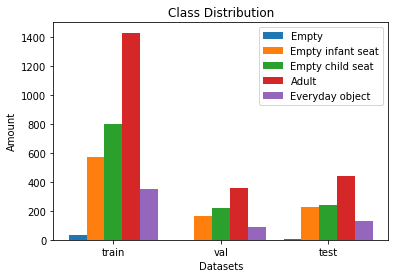

In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ind = np.array([0, 3, 6])
width = 0.50

# class: 'Empty'
vals0 = [train_dict['0'], val_dict['0'], test_dict['0']]
bar0 = plt.bar(ind+width, vals0, width)

# class: 'Empty infant seat'
vals1 = [train_dict['1'], val_dict['1'], test_dict['1']]
bar1 = plt.bar(ind+width*2, vals1, width)

# class: 'Empty child seat'
vals2 = [train_dict['2'], val_dict['2'], test_dict['2']]
bar2 = plt.bar(ind+width*3, vals2, width)

# class: 'Adult'
vals3 = [train_dict['3'], val_dict['3'], test_dict['3']]
bar3 = plt.bar(ind+width*4, vals3, width)

# class: 'Everyday object'
vals4 = [train_dict['4'], val_dict['4'], test_dict['4']]
bar4 = plt.bar(ind+width*5, vals4, width)

plt.xlabel("Datasets")
plt.ylabel('Amount')
plt.title("Class Distribution")
  
plt.xticks(ind+width*3,['train', 'val', 'test'])
plt.legend( (bar0, bar1, bar2, bar3, bar4), tuple(classes) )
plt.show()

# Download Yolo v5 project

In [4]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [5]:
%cd yolov5
!pip install -r requirements.txt

E:\VICERI_BACK\__dataset\yolov5


# Inference test with a pre-trained model, before training the new one

In [6]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Images
img = 'https://ultralytics.com/images/zidane.jpg'

# Inference
results = model(img)

# Results
results.print()

C:\Users\abianchi\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\abianchi/.cache\torch\hub\master.zip
YOLOv5  2022-4-20 torch 1.11.0+cpu CPU



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14.1M/14.1M [00:01<00:00, 11.3MB/s]
Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients


Adding AutoShape... 
image 1/1: 720x1280 2 persons, 2 ties
Speed: 831.1ms pre-process, 242.0ms inference, 3.0ms NMS per image at shape (1, 3, 384, 640)


# Training with recently created dataset, using sviro.yaml file

In [45]:
%cd data

with open('sviro.yaml', 'w') as f:
    f.write(\
"# train, val and test datasets (image directory or *.txt file with image paths)\n\
path: ../YOLO_DATASET\n\
train: train.txt  # 1600 images\n\
val: val.txt  # 400 images\n\
test: test.txt  # 500 images\n\
\n\
# number of classes\n\
nc: 5\n\
\n\
# class names\n\
#          0              1                   2              3             4\n\
names: ['Empty', 'Empty infant seat', 'Empty child seat', 'Adult', 'Everyday object']\n")

%cd ../

E:\VICERI_BACK\__dataset\yolov5\data
E:\VICERI_BACK\__dataset\yolov5


In [1]:
%cd yolov5

E:\VICERI_BACK\__dataset\yolov5


In [2]:
!python train.py --data sviro.yaml --cfg yolov5s.yaml --weights yolov5s.pt --batch-size 16 --epochs 10

train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=sviro.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 3 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5  v6.1-140-g3f3852e torch 1.11.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_

# Run detections on test dataset

In [5]:
%cd yolov5

E:\VICERI_BACK\__dataset\yolov5


In [19]:
import os
base_dir = os.getcwd()

model = os.path.join(base_dir, 'runs', 'train', 'exp6', 'weights', 'best.pt')
%cd ../
base_dir = os.getcwd()
img_dir = os.path.join(base_dir, 'YOLO_DATASET', 'images', 'test')
%cd yolov5

print(model)
print(img_dir)
print(os.getcwd())

E:\VICERI_BACK\__dataset
E:\VICERI_BACK\__dataset\yolov5
E:\VICERI_BACK\__dataset\yolov5\runs\train\exp6\weights\best.pt
E:\VICERI_BACK\__dataset\YOLO_DATASET\images\test
E:\VICERI_BACK\__dataset\yolov5


In [21]:
!python detect.py --weights $model --source $img_dir

detect: weights=['E:\\VICERI_BACK\\__dataset\\yolov5\\runs\\train\\exp6\\weights\\best.pt'], source=E:\VICERI_BACK\__dataset\YOLO_DATASET\images\test, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  v6.1-140-g3f3852e torch 1.11.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7023610 parameters, 0 gradients
image 1/500 E:\VICERI_BACK\__dataset\YOLO_DATASET\images\test\i3_test_imageID_0_GT_6_0_4.png: 448x640 1 Empty child seat, 1 Everyday object, Done. (0.190s)
image 2/500 E:\VICERI_BACK\__dataset\YOLO_DATASET\images\test\i3_test_imageID_100_GT_4_0_0.png: 448x640 1 Everyday object, Done. (0.126s)
image 3/500 E:\VICERI_BACK\__dataset\YOLO_DATAS